# <font color='red'> 1 - ENTENDIMENTO DO NEGÓCIO
<a id='descricao'></a>

## <font color='blue'> DESCRIÇÃO DO NEGÓCIO

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

<font color='green'> **Objetivo:**
- Fazer uma previsão de quais funcionários são mais propensos para sair do emprego.

<font color='green'> **O contexto:**

- Contratar e reter funcionários são tarefas extremamente complexas que exigem capital, tempo e habilidades.
- Pequenos empresários gastam em torno de 40% das horas de trabalho em tarefas que não geram receitas, como a contratação.
- Empresas gastam de 15% a 20% do salário dos funcionários para recrutar um novo candidato.
- Uma empresa média perde entre 1% e 2.5% de sua receita total no tempo que leva para treinar um novo funcionário.
- A contratação de um novo funcionário custa em média $7645 (em uma empresa com aproximadamente 500 funcionários).
- Demora mais ou menos 52 dias para um funcionário ocupar de fato sua nova posição.

Fonte: https://toggl.com/blog/cost-of-hiring-an-employee

<font color='green'> **Causa raiz do problema:**
- Dificuldade em manter as pessoas talentosas na empresa.

<font color='green'> **Stakeholder:**
- Gerente do departamento de Recursos Humanos.

<font color='green'> **O formato da solução:**
- Granularidade
    - Por cada funcionário da empresa.
- Tipo do problema
    - Problema de classificação binária
- Potenciais métodos
    - Random forest
- Formato da entrega
    - Tabela em excel

**Definição:**
- Usar Machine Learning para classificar quais funcionários tem uma tendência de para sair do emprego.

## <font color='blue'> PLANEJAMENTO DA SOLUÇÃO

O planejamento da solução para este projeto se baseia no método CRISP-DM (Cross Industry Standard Process for Data Mining), que é uma metodologia cíclica e flexivel voltada para resolução de problemas que envolvem grande volume de dados que permite a entrega rápida de valor para os times de negócio.

1. **ENTENDIMENTO DO NEGÓCIO**
2. **COLETA DOS DADOS**
3. **LIMPEZA DOS DADOS**
    - **Passo 1:** Análise Descritiva dos Dados
    - **Passo 2:** Filtragem das Variáveis
    
    
4. **ANÁLISE EXPLORATÓRIA DOS DADOS**
    - **Passo 3:** Exploração de Dados
    
    
5. **PREPARAÇÃO DOS DADOS**
    - **Passo 4:** Modelagem dos Dados
    - **Passo 5:** Seleção de Variáveis (Featuren selection)
    
    
6. **TREINAMENTO ALGORITMOS DE MACHINE LEARNING**
    - **Passo 6:** Algoritmos de Machine Learning
    
    
7. **AVALIAÇÃO DO ALGORITMO**
    - **Passo 7:** Tradução e Interpretação do Erro


8. **IMPLEMENTAR O MODELO PARA A PRODUÇÃO**
    - **Passo 8:** Modelo em Produção
    
- **INSIGHTS**
- **PRÓXIMO PASSOS**

# <font color='red'> 2 - COLETA DOS DADOS
<a id='dados'></a>

## <font color='blue'> PASSO 0.0 - Biblioteca

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection
import tensorflow as tf
import pickle

from pyod.models.knn         import KNN
from scipy                   import stats  as ss 
from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import precision_score
from sklearn.metrics         import recall_score
from yellowbrick.classifier  import ConfusionMatrix
from sklearn.metrics         import f1_score
from sklearn.metrics         import classification_report
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import confusion_matrix
from tabulate                import tabulate 

## <font color='blue'> PASSO 0.1 - Carregando dos dados

In [2]:
df_funcionario = pd.read_csv('Datasets/Human_Resources.csv')

In [3]:
pd.set_option('display.max_columns',None)

# <font color='red'> 3 - LIMPEZA DOS DADOS
<a id='definicao'></a>

## <font color='blue'> PASSO 1 - Análise Descritiva dos Dados
<a id='passo1'></a>

### <font color='#F37126'> 1.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [4]:
df_funcionario.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df_funcionario.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


**Nota:**
- **Age** = idade das pessoas
- **Attrition** = variável resposta
- **BusinessTravel** = indica se a pessoa faz viajem na empresa
- **DailyRate** = cálculo do sálario da pessoa
- **Department** = departamento onde a pessoa trabalha
- **DistanceFromHome** = distância da casa para empresa em Km
- **Education** = indica o grau de escolaridade
- **EducationField** = indica a área da pessoa de atuação na empresa
- **EmployeeCount** = é como se fosse a contagem dos funcionários
- **EmployeeNumber**= número dos funcionários, como se fosse o registro do funcionário
- **EnvironmentSatisfaction** = nível de satisfação do funcionário com o ambiente de trabalho
- **Gender** = gênero
- **HourlyRate** = indica o número de horas trabalhadas
- **JobInvolvement** = envolvimento no trabalho
- **JobLevel** = nível de trabalho
- **JobRole** = nome das profisões
- **JobSatisfaction** = satisfação no trabalho
- **MaritalStatus** = estado civil
- **MonthlyIncome** = renda mensal
- **MonthlyRate** = taxa mensal
- **NumCompaniesWorked** = número de empresas que o fúnionario trabalhou
- **Over18** = indica se o funcionário tem mais de 18 anos
- **OverTime** = indica se o funcionário faz horas extras
- **PercentSalaryHike** = indica o percentual de aumento que o funcionário ganhou
- **PerformanceRating** = avaliação de desempenho do funcionário
- **RelationshipSatisfaction** = indica o nível de satisfação
- **StandardHours** = quantas horas o funcionário trabalha 
- **StockOptionLevel** = indica se a empresa tem ações na bolsa de valores
- **TotalWorkingYears** = indica quanto tempo o funcionário está trabalhando na empresa
- **TrainingTimesLastYear** = tempo em treinamento
- **WorkLifeBalance** = equilíbrio entre vida profissional
- **YearsAtCompany** = quantos anos o fucionário trabalhou na empresa
- **YearsInCurrentRole** = quantos anos de atuação na função atual
- **YearsSinceLastPromotion** = anos desde a última promoção
- **YearsWithCurrManage** = quantos anos está trabalhando como gerente

### <font color='#F37126'> 1.2. Transformação

In [6]:
# Função de transformação (0= Não tem chance de sair da empresa / 1= Chance em sair da empresa)
df_funcionario['Attrition'] = df_funcionario['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) 

In [7]:
df_funcionario['OverTime'] = df_funcionario['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df_funcionario['Over18'] = df_funcionario['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

### <font color='#F37126'> 1.3. Colunas

**Visualizando cabeçalho do dataframe**

In [8]:
print(df_funcionario.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [9]:
# Alterando as nomes das colunas
cols_old = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 
            'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 
            'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 
            'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 
            'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

snakecase = lambda x: inflection.underscore (x)

cols_new = list(map(snakecase,cols_old))

df_funcionario.columns = cols_new

In [10]:
print(df_funcionario.columns.tolist())

['age', 'attrition', 'business_travel', 'daily_rate', 'department', 'distance_from_home', 'education', 'education_field', 'employee_count', 'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike', 'performance_rating', 'relationship_satisfaction', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']


### <font color='#F37126'> 1.4. Dimensões de dados

**Verificando informações sobre o dataframe: linhas e colunas**

In [11]:
df_funcionario.shape

(1470, 35)

In [12]:
df_funcionario.apply(lambda x: x.unique().shape[0])

age                             43
attrition                        2
business_travel                  3
daily_rate                     886
department                       3
distance_from_home              29
education                        5
education_field                  6
employee_count                   1
employee_number               1470
environment_satisfaction         4
gender                           2
hourly_rate                     71
job_involvement                  4
job_level                        5
job_role                         9
job_satisfaction                 4
marital_status                   3
monthly_income                1349
monthly_rate                  1427
num_companies_worked            10
over18                           1
over_time                        2
percent_salary_hike             15
performance_rating               2
relationship_satisfaction        4
standard_hours                   1
stock_option_level               4
total_working_years 

### <font color='#F37126'> 1.5. Tipos de dados

**Verificando o tipo das colunas**

In [13]:
df_funcionario.dtypes

age                            int64
attrition                      int64
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_count                 int64
employee_number                int64
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over18                         int64
over_time                      int64
percent_salary_hike            int64
performance_rating             int64
relationship_satisfaction      int64
standard_hours                 int64
s

### <font color='#F37126'> 1.6. Check dados nulos

**Verificando dados nulos**

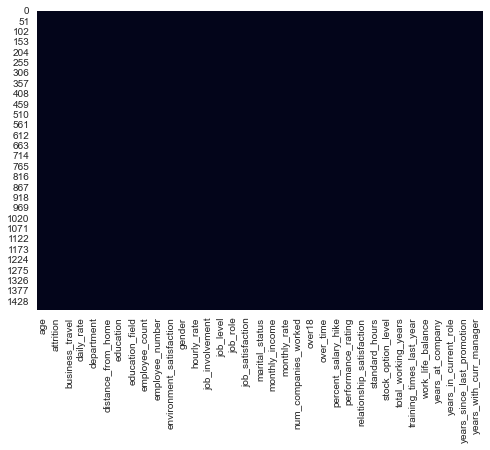

In [14]:
sns.heatmap(df_funcionario.isnull(),cbar=False);

In [15]:
df_funcionario.isnull().sum()

age                           0
attrition                     0
business_travel               0
daily_rate                    0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_count                0
employee_number               0
environment_satisfaction      0
gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
over18                        0
over_time                     0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at

In [16]:
# Conta a quantidade de missing values totais da base.
df_funcionario.isnull().sum().sum()

0

### <font color='#F37126'> 1.7. Estatística descritiva

**Descrevendo estatísticas sobre os dados**

#### Separando os tipos de variáveis

In [17]:
num_dados = df_funcionario.select_dtypes( include= ['int64','float64'] )
cat_dados = df_funcionario.select_dtypes( exclude= ['int64','float64'])

In [18]:
df_funcionario.describe().round(1)

,age,attrition,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,0.2,802.5,9.2,2.9,1.0,1024.9,2.7,65.9,2.7,2.1,2.7,6502.9,14313.1,2.7,1.0,0.3,15.2,3.2,2.7,80.0,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,0.4,403.5,8.1,1.0,0.0,602.0,1.1,20.3,0.7,1.1,1.1,4708.0,7117.8,2.5,0.0,0.5,3.7,0.4,1.1,0.0,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,0.0,102.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1009.0,2094.0,0.0,1.0,0.0,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,0.0,465.0,2.0,2.0,1.0,491.2,2.0,48.0,2.0,1.0,2.0,2911.0,8047.0,1.0,1.0,0.0,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,0.0,802.0,7.0,3.0,1.0,1020.5,3.0,66.0,3.0,2.0,3.0,4919.0,14235.5,2.0,1.0,0.0,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,0.0,1157.0,14.0,4.0,1.0,1555.8,4.0,83.8,3.0,3.0,4.0,8379.0,20461.5,4.0,1.0,1.0,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1.0,1499.0,29.0,5.0,1.0,2068.0,4.0,100.0,4.0,5.0,4.0,19999.0,26999.0,9.0,1.0,1.0,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


#### Colunas numéricas

In [19]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_dados.apply( np.mean )).T
ct2 = pd.DataFrame( num_dados.apply( np.median )).T

In [20]:
# Desvio Padrão
d1 = pd.DataFrame( num_dados.apply( np.std ) ).T
# Mínimo
d2 = pd.DataFrame( num_dados.apply( min ) ).T
# Máximo
d3 = pd.DataFrame( num_dados.apply( max ) ).T
# Range
d4 = pd.DataFrame( num_dados.apply( lambda x: x.max() - x.min() ) ).T
# Skew
d5 = pd.DataFrame( num_dados.apply( lambda x: x.skew() ) ).T
# Kurtosis
d6 = pd.DataFrame( num_dados.apply( lambda x: x.kurtosis() ) ).T 

In [21]:
# Juntando as metricas em uma tabela
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,18.0,60.0,42.0,36.923810,36.0,9.132266,0.413286,-0.404145
1,attrition,0.0,1.0,1.0,0.161224,0.0,0.367738,1.844366,1.403594
2,daily_rate,102.0,1499.0,1397.0,802.485714,802.0,403.371829,-0.003519,-1.203823
3,distance_from_home,1.0,29.0,28.0,9.192517,7.0,8.104107,0.958118,-0.224833
4,education,1.0,5.0,4.0,2.912925,3.0,1.023817,-0.289681,-0.559115
5,employee_count,1.0,1.0,0.0,1.000000,1.0,0.000000,0.000000,0.000000
6,employee_number,1.0,2068.0,2067.0,1024.865306,1020.5,601.819530,0.016574,-1.223179
7,environment_satisfaction,1.0,4.0,3.0,2.721769,3.0,1.092710,-0.321654,-1.202521
8,hourly_rate,30.0,100.0,70.0,65.891156,66.0,20.322512,-0.032311,-1.196398
9,job_involvement,1.0,4.0,3.0,2.729932,3.0,0.711319,-0.498419,0.270999


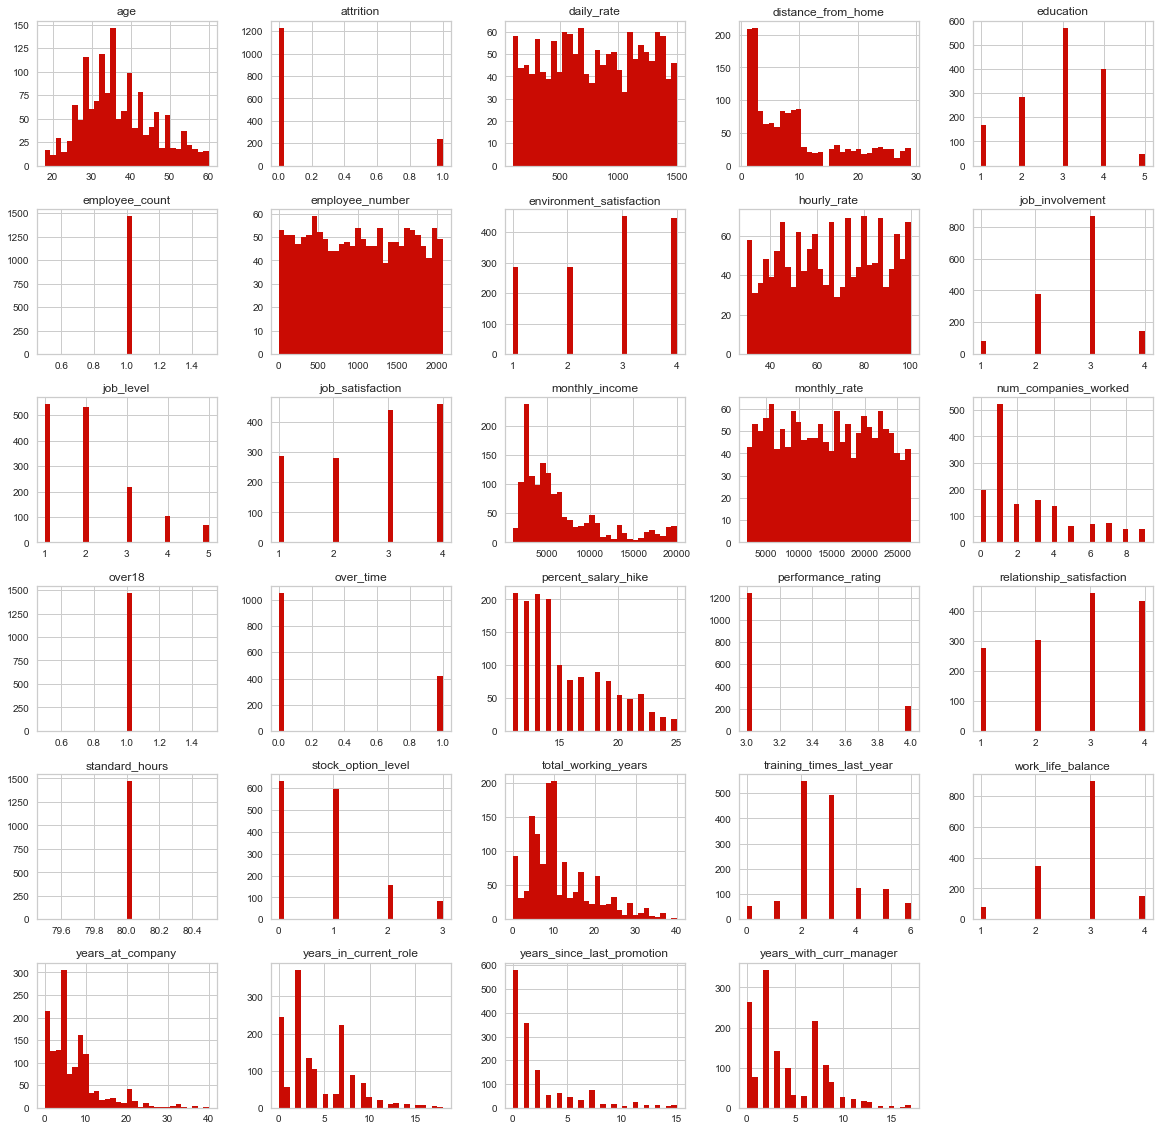

In [22]:
# Histograma para ver a distribuição dos dados
num_dados.hist(bins=30, figsize=(20,20),color='r');

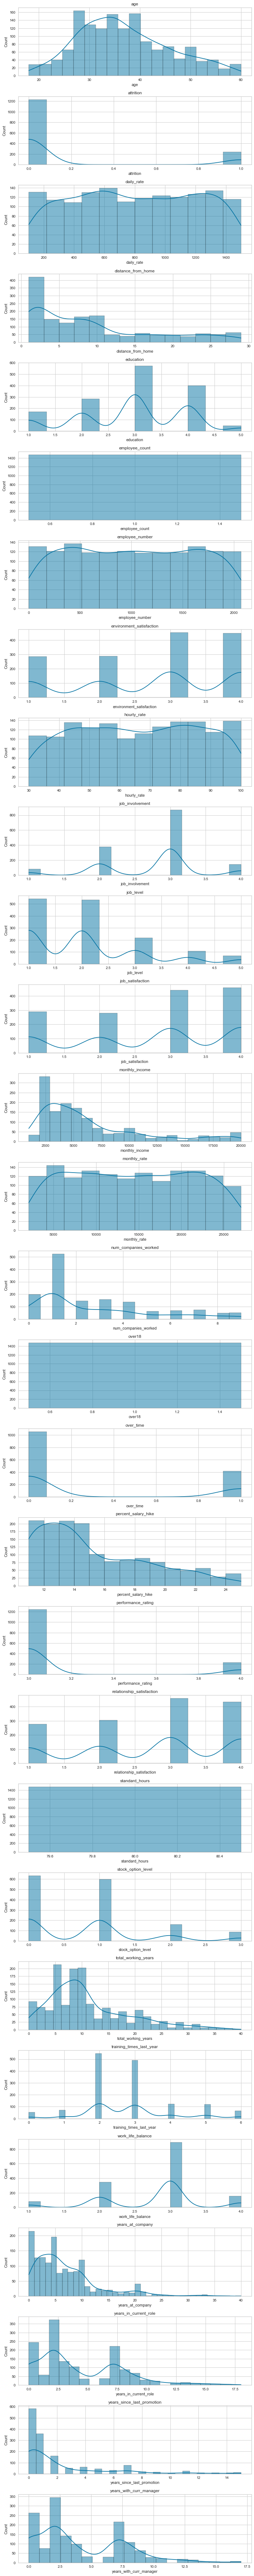

In [23]:
# Histograma para ver a distribuição dos dados para cada atributo
plt.figure(figsize=(10,100))

for i in range(len(num_dados.columns)):
    plt.subplot(29,1, i + 1)
    sns.histplot(num_dados[num_dados.columns[i]], kde=True)
    plt.title(num_dados.columns[i])

plt.tight_layout();

**Nota:**

- Age: A maior concentração de pessoas nesta empresa tem a idade entre 25 à 40 anos.
- Attrition: De acordo com a classe que queremos prever, mostra que temos uma grande maioria de pessoas em torno de 1200 que não tem chances de sair da empresa e em torno de 220 que tem chance de sair da empresa.
- Daily_Rate: Podemos observar que os dados estão em uma distribuição dos dados bem uniforme.
- Distance_From_Home:Podemos perceber que a maioria das pessoas moram próximo da empresa.
- Education: A maioria está no nível 3, que as pessoas com faculdade.
- Employee_Count: Olhando o gráfico, podemos concluir que podemos apagar, porque todos possuem o mesmo valor.
- Environment_Satisfaction: Podemos observar as notas que os funcionarios deram quando foi feito a pesquisa pelo RH.
- Monthly_Income: Podemos notar que a grande maioria das pessoas ganham até 5K e poucas pessoas que ganham mais que 15K.
- Over18: Também tem o mesmo padrão do Employee_Count, todas as pessoa tem mais de 18 anos.
- Standard_Hours: Segue o mesmo padrão de Employee_Count e Over18, também é um indicativo que podemos apagar estes dados.
- Years_At_Company: A maiora das pessoas estão entre o à 10 anos que trabalham na mesma empresa.

#### Colunas Categóricas

In [24]:
# Verificando os valores únicos das colunas
cat_dados.apply( lambda x: x.unique().shape[0] )

business_travel    3
department         3
education_field    6
gender             2
job_role           9
marital_status     3
dtype: int64

### <font color='#F37126'> 1.8. Verificando outliers

age : int64
attrition : int64
daily_rate : int64
distance_from_home : int64
education : int64
employee_count : int64
employee_number : int64
environment_satisfaction : int64
hourly_rate : int64
job_involvement : int64
job_level : int64
job_satisfaction : int64
monthly_income : int64
monthly_rate : int64
num_companies_worked : int64
over18 : int64
over_time : int64
percent_salary_hike : int64
performance_rating : int64
relationship_satisfaction : int64
standard_hours : int64
stock_option_level : int64
total_working_years : int64
training_times_last_year : int64
work_life_balance : int64
years_at_company : int64
years_in_current_role : int64
years_since_last_promotion : int64
years_with_curr_manager : int64


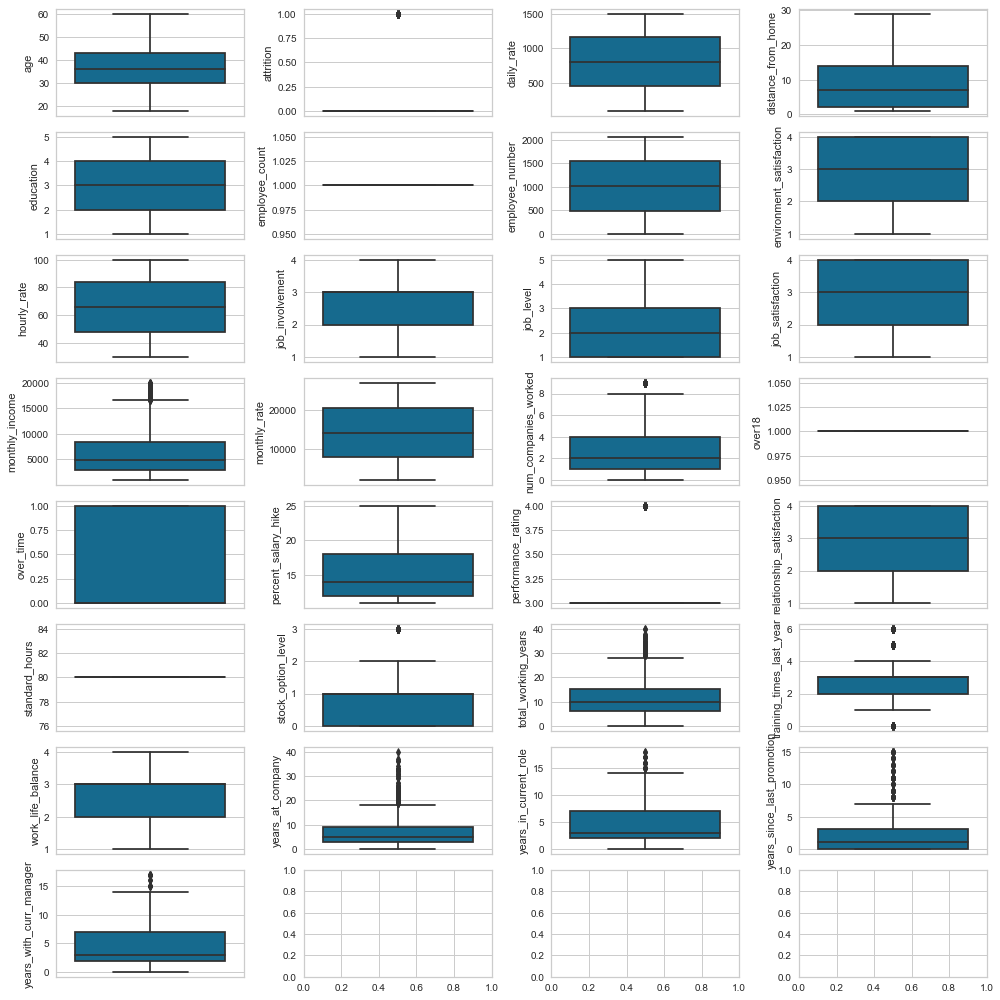

In [25]:
# Carregar variaveis para plot
variaveis_numericas = []
for i in num_dados:
        if num_dados.dtypes[i] == 'int64' or num_dados.dtypes[i] == 'float64':            
            print(i, ':' , num_dados.dtypes[i]) 
            variaveis_numericas.append(i)  
    
    
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(8, 4) #4 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = num_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

In [26]:
# Instanciando o objeto KNN 
detector = KNN()

# Treinando um detector de OUTLIERS
detector.fit(num_dados)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [27]:
# A probiedade LABELS_ retorna um ARRAY com 0 e 1
# 0 significa que NÃO é outlier
# 1 significa que É outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([1323,  147], dtype=int64))

In [29]:
# Observando o calculo da distancia realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 819.8475468 , 1004.29975605,  994.6904041 , ..., 1210.91535625,
        912.43849108, 1089.50860483])

In [30]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [31]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outlier (lista de outlier) e todas colunas
lista_outliers = num_dados.iloc[outliers,:]
lista_outliers

,age,attrition,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
18,53,0,1219,2,4,1,23,1,78,2,4,4,15427,22021,2,1,0,16,3,3,80,0,31,3,3,25,8,3,7
22,34,0,419,7,4,1,28,1,53,3,3,2,11994,21293,0,1,0,11,3,3,80,0,13,4,3,12,6,2,11
25,53,0,1282,5,3,1,32,3,58,3,5,3,19094,10735,4,1,0,11,3,4,80,1,26,3,2,14,13,4,8
29,46,0,705,2,4,1,38,2,83,3,5,1,18947,22822,3,1,0,12,3,4,80,0,22,2,2,2,2,2,1
43,27,0,994,8,3,1,56,4,37,3,3,3,8726,2975,1,1,0,15,3,4,80,0,9,0,3,9,8,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,42,0,300,2,3,1,2031,1,56,3,5,3,18880,17312,5,1,0,11,3,1,80,0,24,2,2,22,6,4,14
1445,41,0,582,28,4,1,2034,1,60,2,4,2,13570,5640,0,1,0,23,4,3,80,1,21,3,3,20,7,0,10
1461,50,1,410,28,3,1,2055,4,39,2,3,1,10854,16586,4,1,1,13,3,2,80,1,20,3,3,3,2,2,0
1462,39,0,722,24,1,1,2056,2,60,2,4,4,12031,8828,0,1,0,11,3,1,80,1,21,2,2,20,9,9,6


In [32]:
num_dados.shape

(1470, 29)

**Nota:**
- Registros que não são outliers: 1.323
- Registros que são outliers: 147
    
Devemos depois fazer uma análise mais profunda porque nem tudo pode ser um outlier.

## <font color='blue'> PASSO 2 - Filtragem das Variáveis
<a id='passo3'></a>

### <font color='#F37126'> 2.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [33]:
df3_funcionario = df_funcionario

### <font color='#F37126'> 2.2. Selecão das Colunas

In [34]:
df3_funcionario.shape[1]

35

In [35]:
# Apagando as informações
df3_funcionario.drop(['employee_count', 'standard_hours', 'over18', 'employee_number'], axis = 1, inplace=True)

In [36]:
df3_funcionario.shape[1]

31

# <font color='red'> 4 - ANÁLISE EXPLORATÓRIA DOS DADOS
<a id='eda'></a>

## <font color='blue'> PASSO 3 - Exploração de Dados
<a id='passo4'></a>

### <font color='#F37126'> 3.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [37]:
df4_funcionario = df3_funcionario

In [38]:
df4_funcionario.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [39]:
df4_funcionario.shape

(1470, 31)

### <font color='#F37126'> 3.2. Análise Univariada

#### Comportamento da variável resposta

In [40]:
# Distribuição dos dados
print('média: ' + str(df4_funcionario.attrition.mean()))
print('mediana: ' + str(df4_funcionario.attrition.median()))
print('moda: ' + str(df4_funcionario.attrition.mode()[0]))
print('desvio padrão: ' + str(df4_funcionario.attrition.std()))
print('valor mínimo: ' + str(df4_funcionario.attrition.min()))
print('valor máximo: ' + str(df4_funcionario.attrition.max()))
print('valor da variancia: ' + str(df4_funcionario.attrition.var()))
print('valor da assimetria: ' + str(df4_funcionario.attrition.skew()))
print('valor da curtose: ' + str(df4_funcionario.attrition.kurtosis()))

média: 0.16122448979591836
mediana: 0.0
moda: 0
desvio padrão: 0.36786303197196357
valor mínimo: 0
valor máximo: 1
valor da variancia: 0.1353232102916059
valor da assimetria: 1.8443661240010911
valor da curtose: 1.4035942007629205


In [41]:
df4_funcionario.groupby('attrition')['attrition'].count()

attrition
0    1233
1     237
Name: attrition, dtype: int64

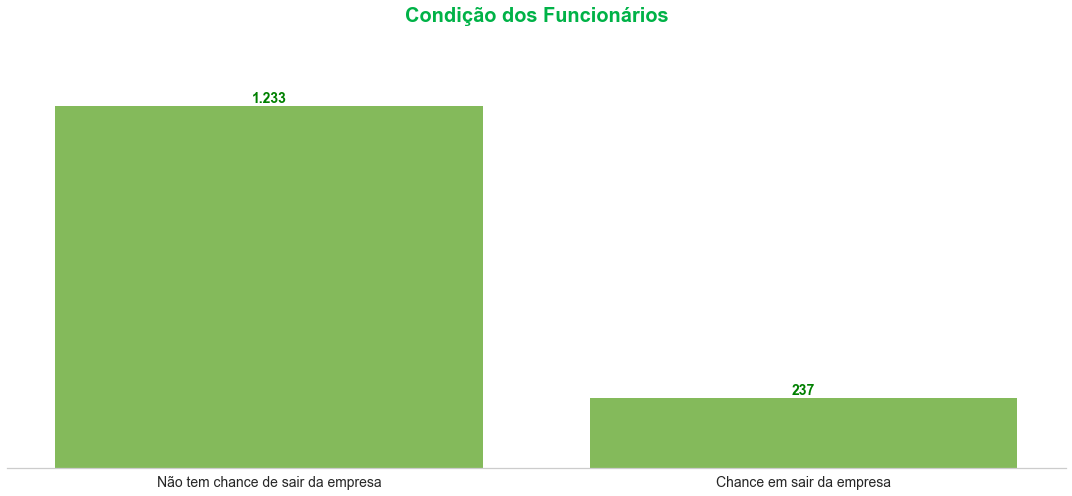

In [42]:
# Gráfico para saber a condição dos funcionários na empresa
fig,ax = plt.subplots( figsize = (15,7))

rotatividade = df4_funcionario.groupby('attrition')['attrition'].count()

ax.bar(rotatividade.index,rotatividade.values, color="#84ba5b" )

ax.set_title("Condição dos Funcionários", fontsize=20, fontweight='bold', color='#00b247' )

for i in np.arange(0,2):
    ax.annotate('{:,.0f}'.format(rotatividade.values[i]).replace(',','.'),
                (rotatividade.index[i],rotatividade.values[i]),
                ha="center",
                va="top",
                xytext=(0,+15),
                textcoords="offset points",
                fontsize=14, 
                fontweight='bold',
                color="green" 
            )    

ax.yaxis.set_visible(False)
ax.tick_params(axis='x',labelsize=14)
ax.xaxis.set_ticks([0,1])
ax.set_xticklabels(['Não tem chance de sair da empresa','Chance em sair da empresa'])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks(np.array([0,1500]))
ax.grid(False)

plt.savefig('Imagens/Condicao_Funcionários.png', bbox_inches='tight')

plt.show()

**Nota:**
- Temos uma proporção de 20% de funcionários com chance em sair da empresa.

#### Criar sub-DataFrame para verificar os dados estatísticos das pessoas que saíram da empresa e das pessoas que não saíram

In [43]:
sairam_df = df4_funcionario[df4_funcionario.attrition == 1]
ficaram_df = df4_funcionario[df4_funcionario.attrition == 0]

In [44]:
print('Total = ', len(df4_funcionario))
print('----------------------------------------------------------------------')
print('Número de funcionários que saíram da empresa = ', len(sairam_df))
print('Porcentagem de funcionários que saíram da empresa = ', (len(sairam_df) / len(df4_funcionario))*100)
print('----------------------------------------------------------------------')
print('Número de funcionários que ficaram na empresa = ', len(ficaram_df))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(ficaram_df) / len(df4_funcionario))*100)

Total =  1470
----------------------------------------------------------------------
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
----------------------------------------------------------------------
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [45]:
sairam_df.describe().round(1)

,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0
mean,33.6,1.0,750.4,10.6,2.8,2.5,65.6,2.5,1.6,2.5,4787.1,14559.3,2.9,0.5,15.1,3.2,2.6,0.5,8.2,2.6,2.7,5.1,2.9,1.9,2.9
std,9.7,0.0,401.9,8.5,1.0,1.2,20.1,0.8,0.9,1.1,3640.2,7208.2,2.7,0.5,3.8,0.4,1.1,0.9,7.2,1.3,0.8,5.9,3.2,3.2,3.1
min,18.0,1.0,103.0,1.0,1.0,1.0,31.0,1.0,1.0,1.0,1009.0,2326.0,0.0,0.0,11.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,28.0,1.0,408.0,3.0,2.0,1.0,50.0,2.0,1.0,1.0,2373.0,8870.0,1.0,0.0,12.0,3.0,2.0,0.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0
50%,32.0,1.0,699.0,9.0,3.0,3.0,66.0,3.0,1.0,3.0,3202.0,14618.0,1.0,1.0,14.0,3.0,3.0,0.0,7.0,2.0,3.0,3.0,2.0,1.0,2.0
75%,39.0,1.0,1092.0,17.0,4.0,4.0,84.0,3.0,2.0,3.0,5916.0,21081.0,5.0,1.0,17.0,3.0,4.0,1.0,10.0,3.0,3.0,7.0,4.0,2.0,5.0
max,58.0,1.0,1496.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,19859.0,26999.0,9.0,1.0,25.0,4.0,4.0,3.0,40.0,6.0,4.0,40.0,15.0,15.0,14.0


In [46]:
ficaram_df.describe().round(1)

,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0
mean,37.6,0.0,812.5,8.9,2.9,2.8,66.0,2.8,2.1,2.8,6832.7,14265.8,2.6,0.2,15.2,3.2,2.7,0.8,11.9,2.8,2.8,7.4,4.5,2.2,4.4
std,8.9,0.0,403.2,8.0,1.0,1.1,20.4,0.7,1.1,1.1,4818.2,7102.3,2.5,0.4,3.6,0.4,1.1,0.8,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,0.0,102.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1051.0,2094.0,0.0,0.0,11.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,31.0,0.0,477.0,2.0,2.0,2.0,48.0,2.0,1.0,2.0,3211.0,7973.0,1.0,0.0,12.0,3.0,2.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,0.0,817.0,7.0,3.0,3.0,66.0,3.0,2.0,3.0,5204.0,14120.0,2.0,0.0,14.0,3.0,3.0,1.0,10.0,3.0,3.0,6.0,3.0,1.0,3.0
75%,43.0,0.0,1176.0,13.0,4.0,4.0,83.0,3.0,3.0,4.0,8834.0,20364.0,4.0,0.0,18.0,3.0,4.0,1.0,16.0,3.0,3.0,10.0,7.0,3.0,7.0
max,60.0,0.0,1499.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,19999.0,26997.0,9.0,1.0,25.0,4.0,4.0,3.0,38.0,6.0,4.0,37.0,18.0,15.0,17.0


**Nota:**
- **Comparativo dos dois dataframe:**
<br><br>
- age: A média das pessoas que saem da empresa é de 33 anos  e a média das pessoas que ficam é de 37 anos e isso acaba validando a ideia que em geral as pessoas mais novas tem uma maior tendência de sairem da empresa.
- daily_rate: Para as pessoas que sairam a média é de 750 e para as pessoas que ficaram é 812,isso indica que o salário das pessoas que ficam na empresa é maior que das pessoas que saem da empresa e isso pode ser um indicativo que as pessoas que saem da empresa elas vão procurar um emprego melhor que tenha uma salário melhor.
- distance_from_home: As pessoas que sairam a distância média é de 10 km e para as pessoas que ficaram é de 8 km.
- education: Observando este atributo, pode ser um indicativo de que as pessoas que tem uma formação maior elas consequentemente tem um salário maior e por isso que elas acabam ficando na empresa. As pessoas que tem um grau de escolaridade menor tem mais chance de sairem da empresa, então a empresa pode oferecer um desconto em mensalidade de faculdades.

#### Variável da idade

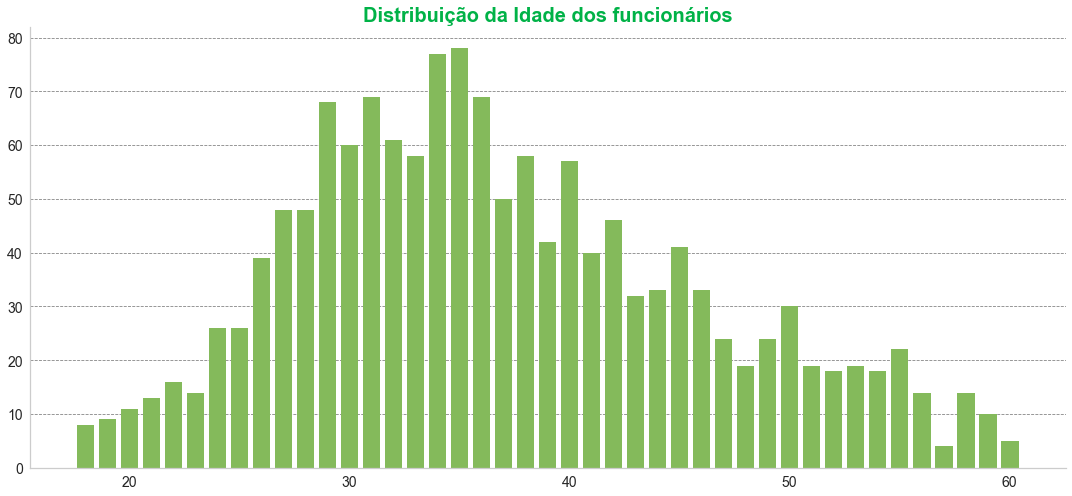

In [47]:
# Gráfico para saber a distribuição da idade dos funcionários na empresa
fig,ax = plt.subplots( figsize = (15,7))

idade = df4_funcionario.groupby('age')['age'].count()

ax.bar(idade.index,idade.values, color="#84ba5b" )

ax.set_title("Distribuição da Idade dos funcionários", fontsize=20, fontweight='bold', color='#00b247' )

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.8)
 
plt.savefig('Imagens/Distribuição_Idade.png', bbox_inches='tight')
    
plt.show()

**Nota:**
- Quase 80 funcionários possuem 35 anos.

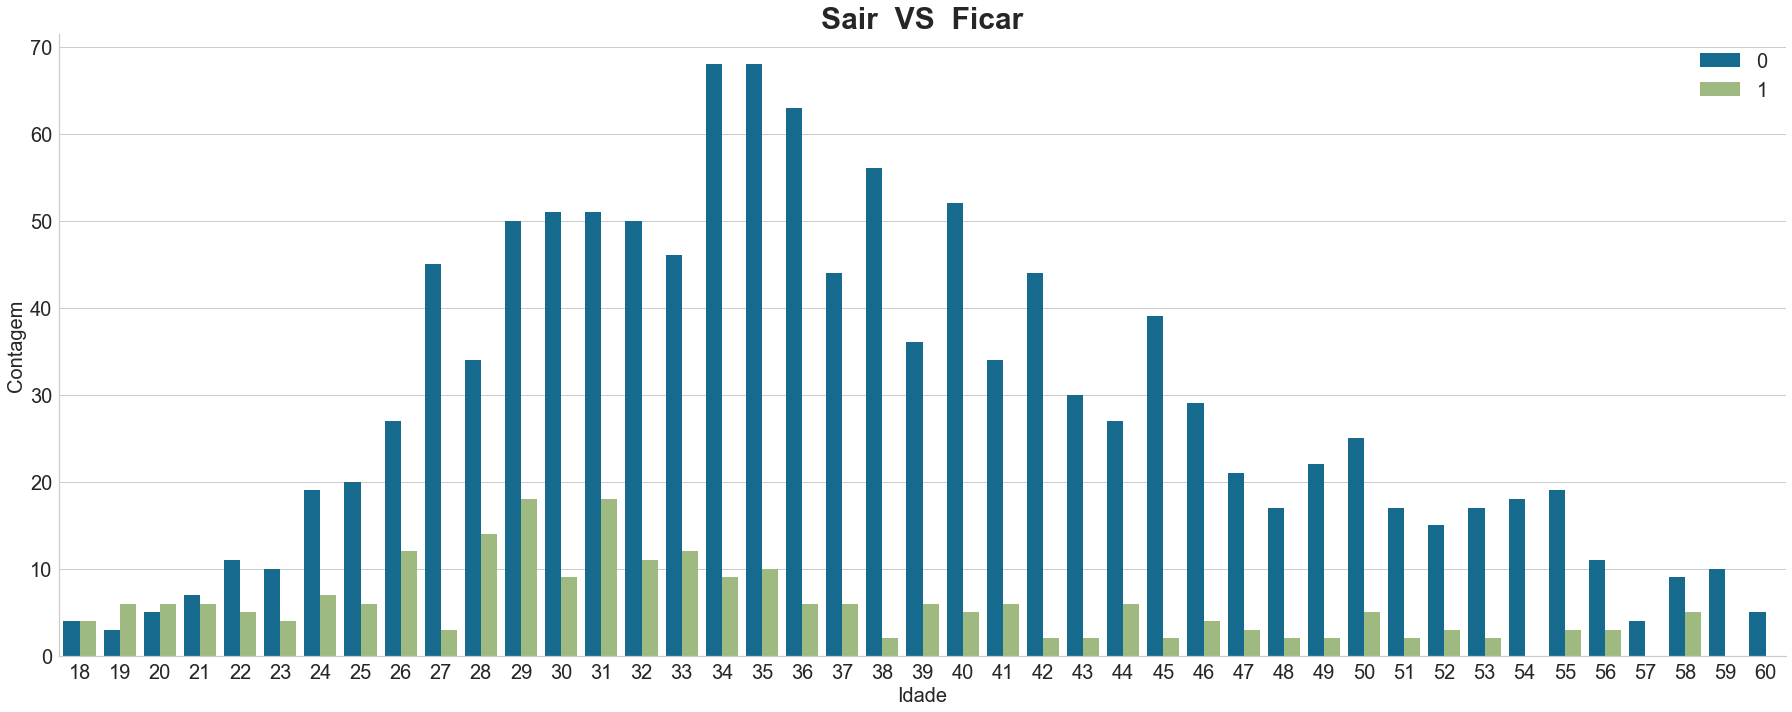

In [48]:
# Gráfico para saber a relação da idade com a chance de sair da empresa
plt.figure(figsize=[25,10])

plot = sns.countplot(x = 'age', hue = 'attrition', data=df4_funcionario)

plt.legend(facecolor="white",fontsize=20,loc = 'upper right')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Sair  VS  Ficar',fontsize = 30,fontweight='bold')
plt.ylabel(" ")
plt.xlabel(" ")
plt.xlabel("Idade",fontsize=20)
plt.ylabel("Contagem",fontsize=20)

sns.despine()

plt.savefig('Imagens/Ficar_Sair.png', bbox_inches='tight')

plt.show()

**Nota:**
- Pessoas com 38 anos a maioria ficam na empresa e uma pequena parcela das pessoas sai.
- Pessoas com 54,57,59 e 60 anos, todas ficam na empresa. 

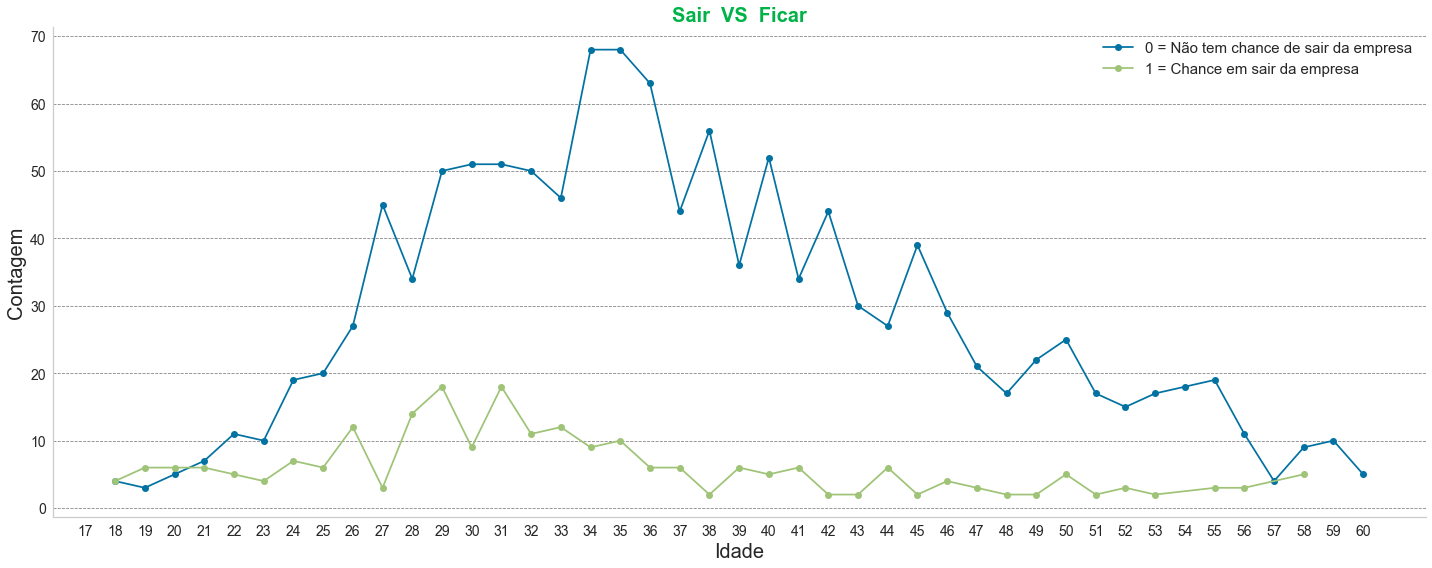

In [49]:
# Gráfico para saber a relação da idade com a chance de sair da empresa
fig, ax = plt.subplots(figsize=(20,8))

aux1 = df4_funcionario[df4_funcionario.attrition == 0].groupby('age')['attrition'].count()
aux2 = df4_funcionario[df4_funcionario.attrition == 1].groupby('age')['attrition'].count()

ax.plot(aux1.index,aux1.values, label='0 = Não tem chance de sair da empresa', marker = 'o')
ax.plot(aux2.index,aux2.values, label='1 = Chance em sair da empresa', marker = 'o')

ax.set_title("Sair  VS  Ficar",fontsize=20,fontweight='bold',color='#00b247')

ax.xaxis.set_ticks(np.arange(17,61))
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(facecolor="white",fontsize=15)
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.8)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Idade",fontsize=20)
plt.ylabel("Contagem",fontsize=20)

plt.savefig('Imagens/IdadeChanceSair.png', bbox_inches='tight')

plt.show()

**Nota:**
- Podemos observar que conforme a idade vai aumentando a tendência das pessoas é que fiquem na empresa.

#### Variável nome das profissões (job_role)

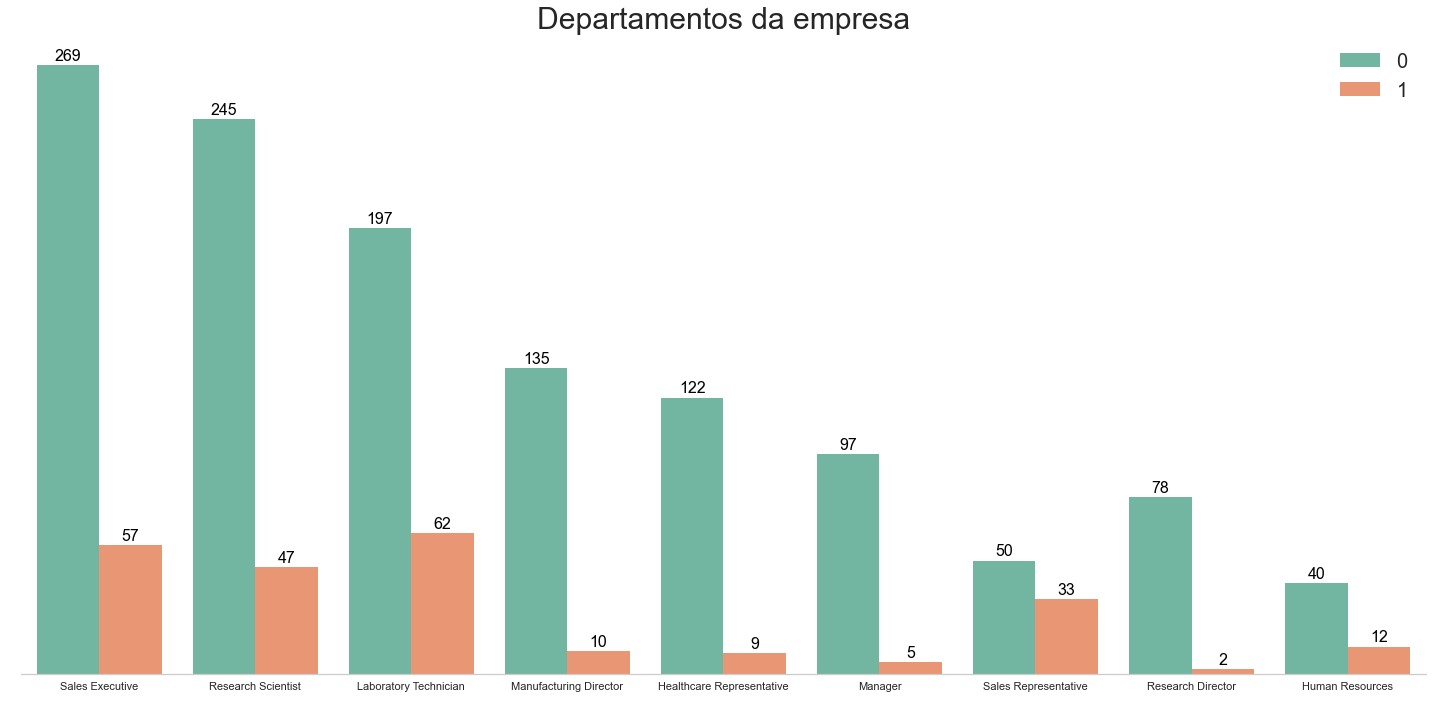

In [50]:
# Gráfico para visualizar os departamentos da empresa
plt.figure(figsize=[20,10])

plot = sns.countplot(x = 'job_role', hue = 'attrition', data = df4_funcionario, palette = "Set2")

for i in plot.patches:
    plot.annotate(i.get_height(), # Texto
                  (i.get_x() + i.get_width() / 2, i.get_height()), # Posição
                  ha='center', va='baseline', fontsize=16,
                  color='black',xytext=(0,5),
                  textcoords='offset points')

plt.yticks([])
plt.legend(facecolor="white",fontsize=20)
plt.xticks(fontsize = 11)
#plt.yticks(fontsize = 15)
plt.ylabel(" ")
plt.xlabel(" ")
plt.title('Departamentos da empresa',fontsize = 30)
plt.grid(False)

#sns.despine()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('Imagens/Departamentos_empresa.png', bbox_inches='tight')

plt.show()

**Nota:**
- No departamento Sales Representative é onde as pessoas mais saem da empresa.

#### Variável estado civil (marital_status)

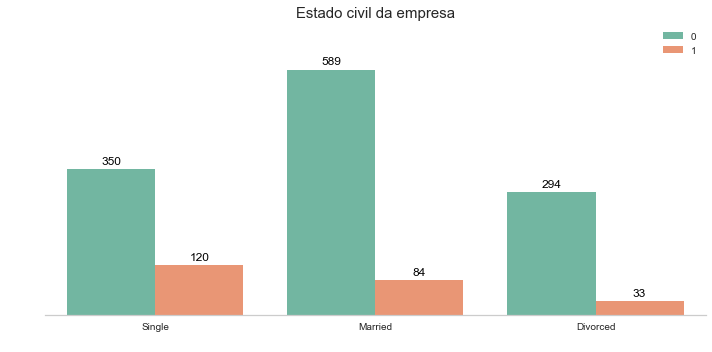

In [51]:
# Gráfico para visualizar a distribuição do estado civel da empresa
plt.figure(figsize=[10,5])

plot = sns.countplot(x = 'marital_status', hue = 'attrition', data = df4_funcionario, palette = "Set2")

for i in plot.patches:
    plot.annotate(i.get_height(), # Texto
                  (i.get_x() + i.get_width() / 2, i.get_height()), # Posição
                  ha='center', va='baseline', fontsize=12,
                  color='black',xytext=(0,5),
                  textcoords='offset points')

plt.legend(facecolor="white",fontsize=10)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

#plt.yticks([])
plt.yticks(np.array([0,700]),color='White')

plt.title('Estado civil da empresa',fontsize = 15)
plt.grid(False)

plt.ylabel(" ")
plt.xlabel(" ")

#sns.despine()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('Imagens/Estado_civil_empresa.png', bbox_inches='tight')

plt.show()

**Nota:**
- As pessoas que mais saem da empresa são solteiras (o).

#### Variável envolvimento no trabalho (job_involvement)

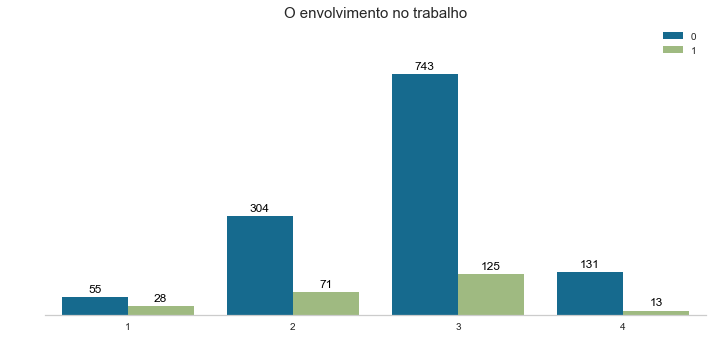

In [52]:
# Gráfico para visualizar o envolvimento no trabalho
plt.figure(figsize=[10,5])

plot = sns.countplot(x = 'job_involvement', hue = 'attrition', data = df4_funcionario)

for i in plot.patches:
    plot.annotate(i.get_height(), # Texto
                  (i.get_x() + i.get_width() / 2, i.get_height()), # Posição
                  ha='center', va='baseline', fontsize=12,
                  color='black',xytext=(0,5),
                  textcoords='offset points')

plt.legend(facecolor="white",fontsize=10)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.yticks(np.array([0,900]),color='White')

plt.xlabel(" ")
plt.ylabel(" ")

plt.title('O envolvimento no trabalho',fontsize = 15)

plt.grid(False)

#sns.despine()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('Imagens/Envolvimento_trabalho.png', bbox_inches='tight')

plt.show()

**Nota:**
- Na pesquisa do RH as pessoas que deram a nota 3, são as que mais saem da empresa.

#### Variável nível de trabalho (job_level)

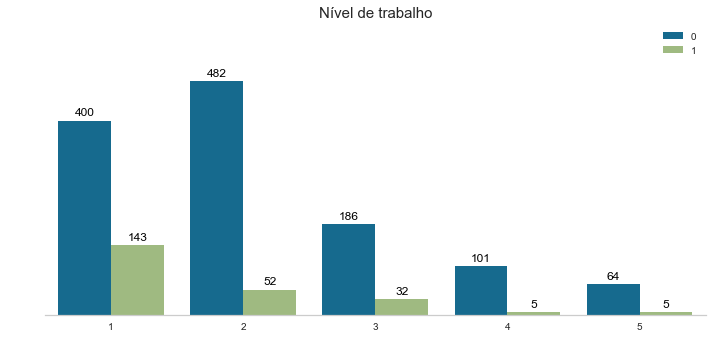

In [53]:
# Gráfico para visualizar o envolvimento no trabalho
plt.figure(figsize=[10,5])

plot = sns.countplot(x = 'job_level', hue = 'attrition', data = df4_funcionario)

for i in plot.patches:
    plot.annotate(i.get_height(), # Texto
                  (i.get_x() + i.get_width() / 2, i.get_height()), # Posição
                  ha='center', va='baseline', fontsize=12,
                  color='black',xytext=(0,5),
                  textcoords='offset points')

plt.legend(facecolor="white",fontsize=10)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.yticks(np.array([0,600]),color='White')

plt.xlabel(" ")
plt.ylabel(" ")

plt.title('Nível de trabalho',fontsize = 15)
plt.grid(False)

#sns.despine()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('Imagens/Nível_trabalho.png', bbox_inches='tight')

plt.show()

**Nota:**
- A maioria das pessoas que saem estão na categoria 1, no grupo de pessoas que tem os salários mais baixo.

#### Variavél distância da casa para empresa (distance_from_home) - Densidade de probabilidade 

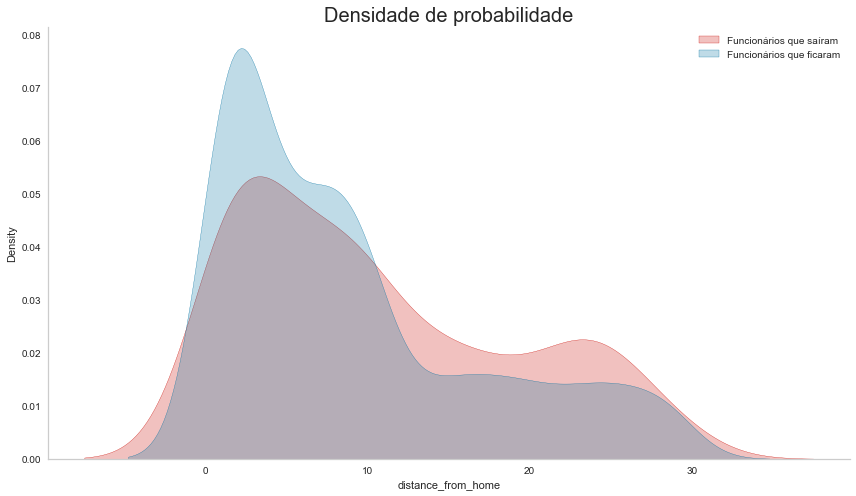

In [54]:
# Gráfico que verifica a densidade de probabilidade de uma variável numérica
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))

sns.kdeplot(sairam_df['distance_from_home'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram_df['distance_from_home'], label = 'Funcionários que ficaram', shade = True, color = 'b')

plt.legend(facecolor="white",fontsize=10)
plt.title('Densidade de probabilidade',fontsize = 20)
plt.grid(False)

sns.despine()

plt.savefig('Imagens/Densidade_probabilidade_1.png', bbox_inches='tight')

plt.show()

**Nota:**

O gráfico mostra a distribuição de probabilidade da variável.
- A maioria das pessoas que sairam da empresa, elas moram entre 1 a 10 km de casa até o trabalho.
- A densidade das pessoas que ficam na empresa está entre 1 á 3 km e proporção de pessoas moram maior que 10 km é menor que a proporção das pessoas que sairam.

#### Variavél quanto tempo o funcionário está trabalhando na empresa (total_working_years) - Densidade de probabilidade

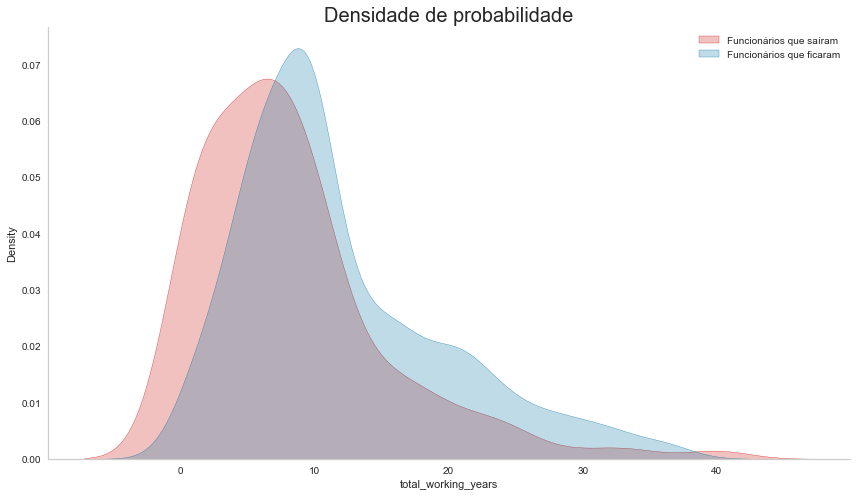

In [55]:
# KDE (Kernel Density Estimate) - gráfico que verifica a densidade de probabilidade de uma variavél númerica
plt.figure(figsize=(12,7))

sns.kdeplot(sairam_df['total_working_years'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram_df['total_working_years'], label = 'Funcionários que ficaram', shade = True, color = 'b')

plt.legend(facecolor="white",fontsize=10)
plt.title('Densidade de probabilidade',fontsize = 20)
plt.grid(False)

sns.despine()

plt.savefig('Imagens/Densidade_probabilidade_2.png', bbox_inches='tight')

plt.show()

**Nota:**
- Podemos ver que a densidade das pessoas que ficaram na empresa é maior que a densidade das pessoas que sairam e isso indica que as pessoas que ficam na empresa elas trabalharam mais anos ao longo da vida do que as pessoas que saem da empresa.
- Podemos até fazer uma associação desse atributo com atributo idade ou seja quanto mais nova a pessoa, mais chance ela tem de procurar outro tipo de emprego.

#### Variável renda mensal - feminino e masculino (monthly_income / gender)

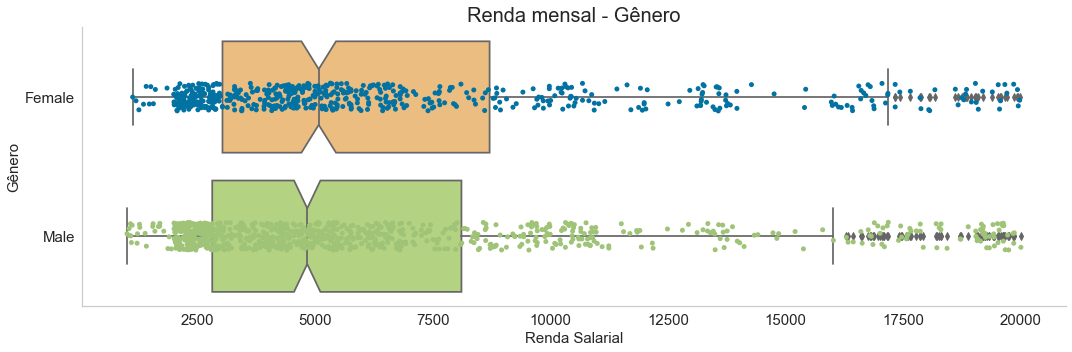

In [56]:
# Verificar se tem algum tipo de ligação entre salário e o gênero
plt.figure(figsize=(15,5))

ax = sns.boxplot(x = 'monthly_income', y = 'gender', data = df4_funcionario, palette="RdYlGn", notch = True)
ax = sns.stripplot(x = "monthly_income", y ="gender", data = df4_funcionario)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Renda Salarial", fontsize=15)
plt.ylabel("Gênero", fontsize=15)
plt.title('Renda mensal - Gênero',fontsize = 20, loc="center")
plt.grid(False)

sns.despine()

plt.savefig('Imagens/Renda_mensal_Gênero.png', bbox_inches='tight')

plt.show()

**Nota:**
- A pessoa que ganha mais é do gênero feminino.
- A mediana do gênero feminino é maior que a mediana do gênero masculino, que pode indicar que nesta base de dados as mulheres ganham mais que os homens.
- Podemos dizer que 75% da mulheres ganham mais que os homens.
- Os valores outliers, pode ser os cargos de gerência.

#### Variável renda mensal - nome das profisões (monthly_income / job_role)

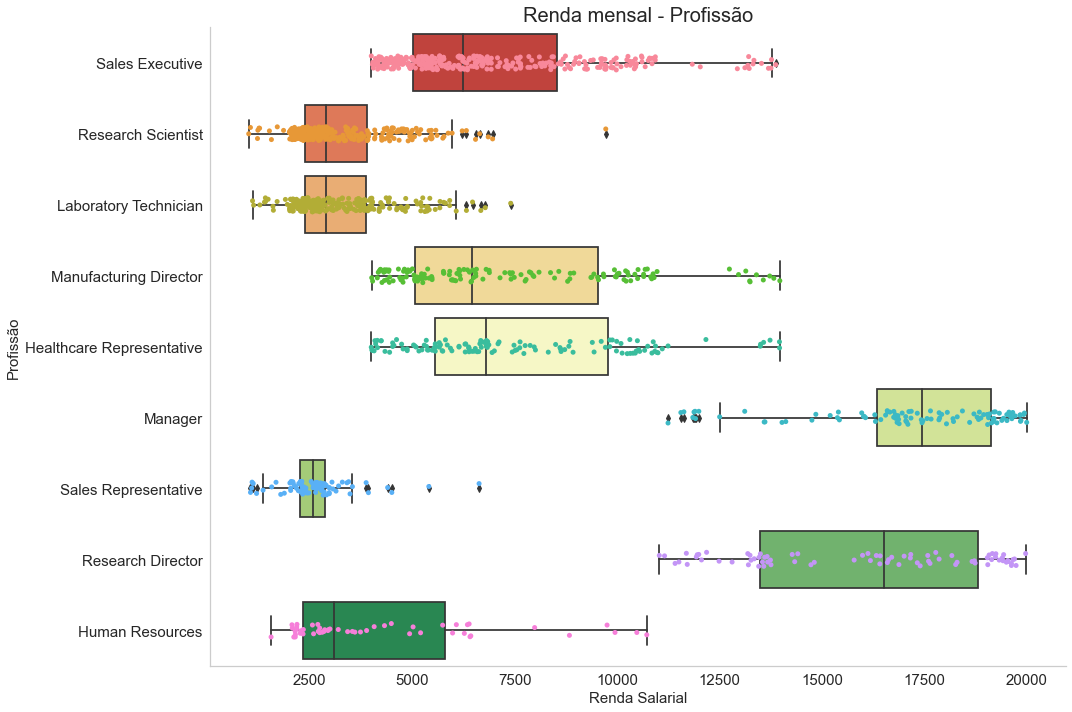

In [57]:
# Verificar se tem algum tipo de ligação entre salário e profissão
plt.figure(figsize=(15,10))

ax = sns.boxplot(x = 'monthly_income', y = 'job_role', data = df4_funcionario, palette="RdYlGn")
ax = sns.stripplot(x = "monthly_income", y ="job_role", data = df4_funcionario)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Renda Salarial", fontsize=15)
plt.ylabel("Profissão", fontsize=15)
plt.title('Renda mensal - Profissão',fontsize = 20, loc="center")
plt.grid(False)

sns.despine()

plt.savefig('Imagens/Renda_mensal_Profissão.png', bbox_inches='tight')

plt.show()

**Nota:**
- Gerentes tem um salário mais altos.
- O Sale Representative é a profissão que mais perde e motivo pode ser pelo salário que é o menor de todos.

### <font color='#F37126'> 3.4. Análise Multivariada

#### Correlação para ver o quanto um atributo pode influênciar o outro

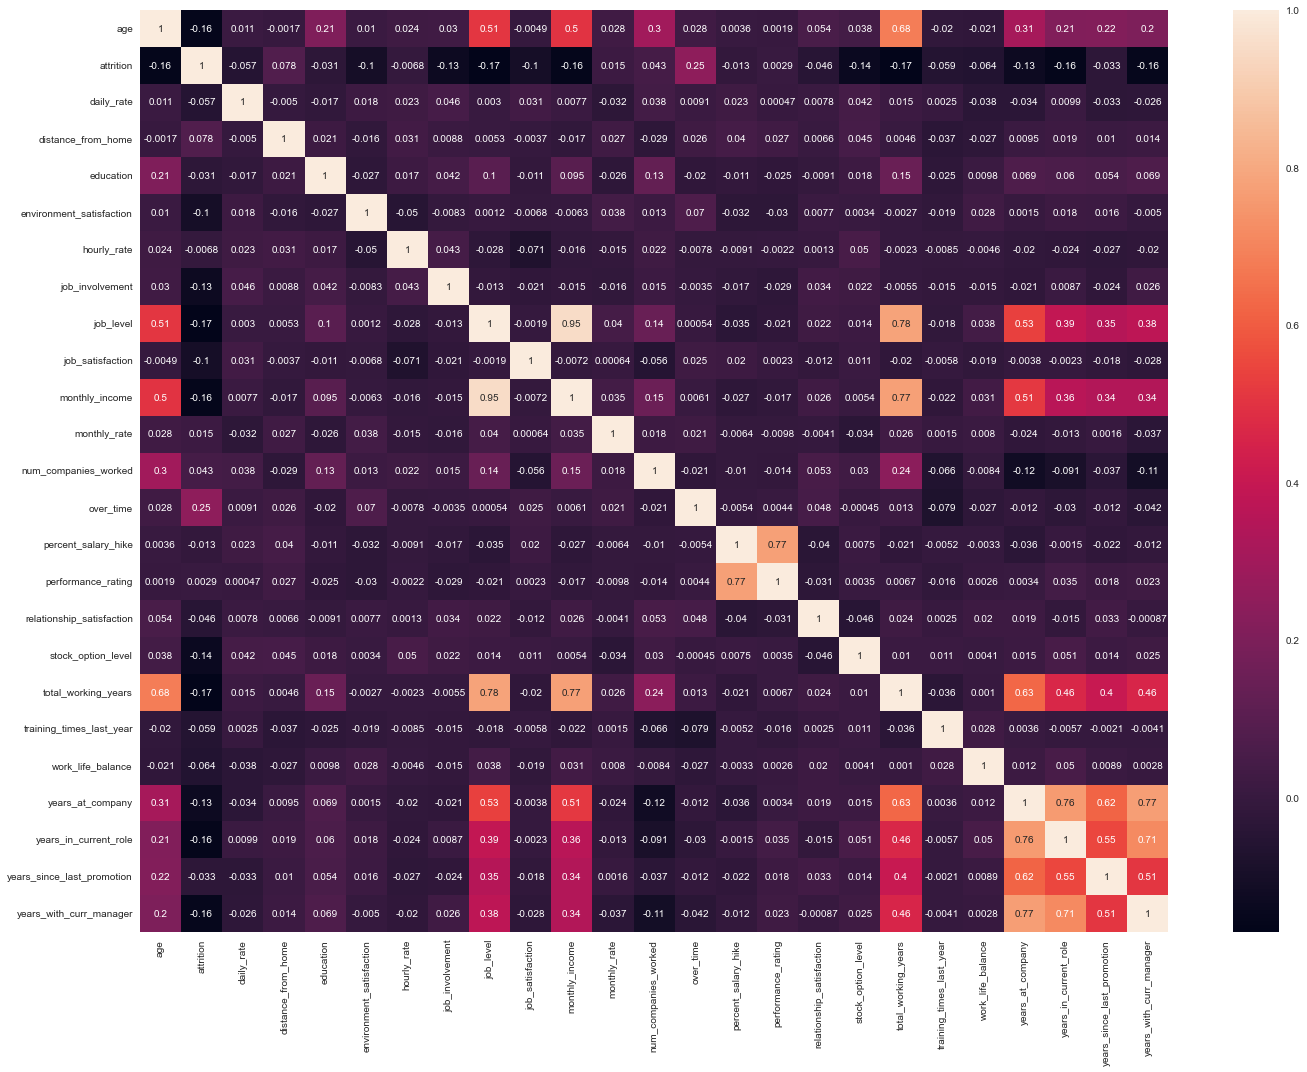

In [58]:
fig, ax = plt.subplots(figsize=(20,15))
correlations = df4_funcionario.corr()
sns.heatmap(correlations, annot=True);
plt.show()

In [59]:
# Criando um rank das correlações
correlations = df4_funcionario.corr()['attrition'].sort_values()
correlations

total_working_years          -0.171063
job_level                    -0.169105
years_in_current_role        -0.160545
monthly_income               -0.159840
age                          -0.159205
years_with_curr_manager      -0.156199
stock_option_level           -0.137145
years_at_company             -0.134392
job_involvement              -0.130016
job_satisfaction             -0.103481
environment_satisfaction     -0.103369
work_life_balance            -0.063939
training_times_last_year     -0.059478
daily_rate                   -0.056652
relationship_satisfaction    -0.045872
years_since_last_promotion   -0.033019
education                    -0.031373
percent_salary_hike          -0.013478
hourly_rate                  -0.006846
performance_rating            0.002889
monthly_rate                  0.015170
num_companies_worked          0.043494
distance_from_home            0.077924
over_time                     0.246118
attrition                     1.000000
Name: attrition, dtype: f

**Nota:**

- Job_Level (0.78) -> Total_Working_Years - Isso indica que o cargo da pessoa está diretamente correlacionado com os anos que pessoa está trabalhando na empresa.
- Total_Working_Years (0.68) -> Age - Quanto mais anos a pessoa está trabalhando na empresa, maior é a idade da pessoa.
- Percent_Salary_Hike (0.77) -> Performance_Ranting - Quanto maior o desempemho da pessoa, mais chance ela tem de ganhar um aumento de salário.
- Monthly_Income (0.77) -> Total_Working_Years - Quanto mais anos a pessoa trabalhou, consequentemente maior é o salário.


**Explicação:**
- quanto mais próximo de 1 mais estão correlacionados.
- correlção positiva é quando as duas variaveis crescem em conjunto (quanto maior a idade, maior é o salário).
- correlação negativa é quando as duas variaveis são opostas (quanto maior a idade menor é o salário)
- uma correlação moderada está em torno de 0.50 e quando temos um valor maior que 0.70 é uma correlação forte, que indica que uma variavél acaba influênciando uma outra variavél.

#### Atributos categóricos

In [60]:
a = df4_funcionario.select_dtypes( include='object' )

In [61]:
a.head()

,business_travel,department,education_field,gender,job_role,marital_status
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [62]:
# Função para calcular Cramér's V
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) ) # Fórmula Cramér's V para cálcular as variáveis categóricas

In [63]:
# Criando a matrix

# Calculate cramer V
a1 = cramer_v( a['business_travel'], a['business_travel'] )
a2 = cramer_v( a['business_travel'], a['department'] )
a3 = cramer_v( a['business_travel'], a['education_field'] )
a4 = cramer_v( a['business_travel'], a['gender'] )
a5 = cramer_v( a['business_travel'], a['job_role'] )
a6 = cramer_v( a['business_travel'], a['marital_status'] )

a7 = cramer_v( a['department'], a['business_travel'] )
a8 = cramer_v( a['department'], a['department'] )
a9 = cramer_v( a['department'], a['education_field'] )
a10 = cramer_v( a['department'], a['gender'] )
a11 = cramer_v( a['department'], a['job_role'] )
a12 = cramer_v( a['department'], a['marital_status'] )

a13 = cramer_v( a['education_field'], a['business_travel'] )
a14 = cramer_v( a['education_field'], a['department'] )
a15 = cramer_v( a['education_field'], a['education_field'] )
a16 = cramer_v( a['education_field'], a['gender'] )
a17 = cramer_v( a['education_field'], a['job_role'] )
a18 = cramer_v( a['education_field'], a['marital_status'] )

a19 = cramer_v( a['gender'], a['business_travel'] )
a20 = cramer_v( a['gender'], a['department'] )
a21 = cramer_v( a['gender'], a['education_field'] )
a22 = cramer_v( a['gender'], a['gender'] )
a23 = cramer_v( a['gender'], a['job_role'] )
a24 = cramer_v( a['gender'], a['marital_status'] )

a25 = cramer_v( a['job_role'], a['business_travel'] )
a26 = cramer_v( a['job_role'], a['department'] )
a27 = cramer_v( a['job_role'], a['education_field'] )
a28 = cramer_v( a['job_role'], a['gender'] )
a29 = cramer_v( a['job_role'], a['job_role'] )
a30 = cramer_v( a['job_role'], a['marital_status'] )

a31 = cramer_v( a['marital_status'], a['business_travel'] )
a32 = cramer_v( a['marital_status'], a['department'] )
a33 = cramer_v( a['marital_status'], a['education_field'] )
a34 = cramer_v( a['marital_status'], a['gender'] )
a35 = cramer_v( a['marital_status'], a['job_role'] )
a36 = cramer_v( a['marital_status'], a['marital_status'] )

# Final dataset
d = pd.DataFrame( {'business_travel': [a1, a2, a3, a4, a5, a6],
                   'department': [a7, a8, a9, a10, a11, a12],
                   'education_field': [a13, a14, a15, a16, a17, a18],
                   'gender': [a19, a20, a21, a22, a23, a24],
                   'job_role':[a15, a26, a27, a28, a29, a30],
                   'marital_status':[a31, a32, a33, a34, a35, a36]})

d = d.set_index( d.columns )

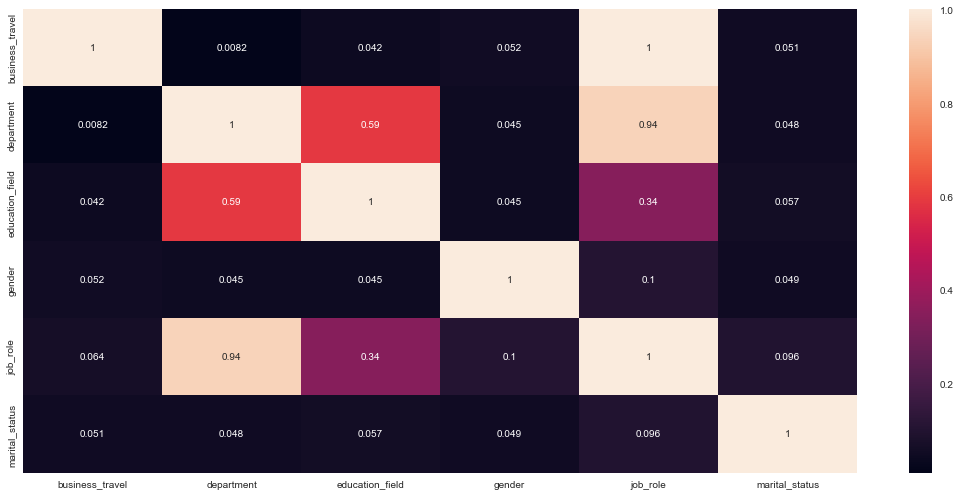

In [64]:
# Matriz de correlações (correlação entre todas as variáveis categóricas)
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap( d, annot=True );
plt.show()

**Nota:**
- Podemos ver que entre o departamento onde a pessoa trabalha e a profisões das pessoas tem uma correlação forte, que pode indicar que os funcionários estão trabalhando de acordo com a área de formação.

# <font color='red'> 5 - PREPARAÇÃO DOS DADOS
<a id='tratamento'></a>

## <font color='blue'> PASSO 4 - Modelagem dos Dados
<a id='passo5'></a>

### <font color='#F37126'> 4.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [65]:
df5_funcionario = df4_funcionario

In [66]:
df5_funcionario.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [67]:
df5_funcionario.shape

(1470, 31)

### <font color='#F37126'> 4.2. Transformação

Na transformação de categórico para numérico, precisamos tomar cuidado na substituição, porque dependendo da substituição o algoritmo pode considerar que um atributo é mais importante que o outro.

Exemplo:

- Masculino não é mais importante que o feminino.
- No atributo 'Education', os valores indica uma ordem de importância, por isso que foi definido os valores 0,1,2,3,4 e 5.
- No atributo 'DistanceFromHome','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', os valores indica uma ordem de importância.

#### Criar um dataframe para armazenar os atributos categóricos

In [68]:
df_cat = df5_funcionario[['business_travel','department','education_field','gender','job_role','marital_status']]

In [69]:
df_cat

,business_travel,department,education_field,gender,job_role,marital_status
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


#### Aplicando a transformação

Quando estamos trabalhando com atributos numéricos que não existe uma ordem de importância, nós criamos variáveis do tipo dummies.
Dummy é aquela que toma o valor de "zero" ou "um" indicando a ausência ou presença de qualidades ou atributos.

In [70]:
# OneHotEncoder cria essas variáveis do tipo dummies
onehotencoder = OneHotEncoder()
df_cat = onehotencoder.fit_transform(df_cat).toarray()

In [71]:
# Transformando para um dataframe do pandas
df_cat = pd.DataFrame(df_cat)
type(df_cat)

pandas.core.frame.DataFrame

#### Criar um dataframe para armazenar os atributos numérico

In [72]:
# Não podemos colocar o atributo que é o objetivo da previsão
df_numerical = df5_funcionario[['age', 'daily_rate', 'distance_from_home','education', 'environment_satisfaction', 
                                'hourly_rate', 'job_involvement','job_level','job_satisfaction','monthly_income',
                                'monthly_rate','num_companies_worked','over_time','percent_salary_hike', 
                                'performance_rating','relationship_satisfaction','stock_option_level','total_working_years',
                                'training_times_last_year', 'work_life_balance','years_at_company','years_in_current_role', 
                                'years_since_last_promotion','years_with_curr_manager']]

In [73]:
df_numerical.head()

,age,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


#### Juntando as duas tabelas

In [74]:
df_all = pd.concat([df_cat, df_numerical], axis = 1)

In [75]:
df_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,age,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


**Nota:**
- Precisamos fazer a normalização nos dados, porque nós temos uma distância muito grande entre os valores e isso pode fazer que o algoritmo de uma prioridade maior nos atributos com os valores mais alto do que para os valores com atributos menores, por isso que devemos deixar eles na mesma escala. 

### <font color='#F37126'> 4.3. Rescaling

In [76]:
# Normalização - deixar eles na mesma escala
scaler = MinMaxScaler()
df_previsores = scaler.fit_transform(df_all)

C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [77]:
# Aqui temos os atributos previsores
df_previsores

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [78]:
# Variável resposta
df_resposta = df5_funcionario['attrition']

In [79]:
df_resposta

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: attrition, Length: 1470, dtype: int64

## <font color='blue'> PASSO 5 - Seleção de Variáveis (Featuren selection)
<a id='passo6'></a>

### <font color='#F37126'> 5.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [80]:
# Aqui temos os atributos previsores
df_previsores.shape

(1470, 50)

In [81]:
# Variável resposta
df_resposta.shape

(1470,)

### <font color='#F37126'> 5.2. Dividir dataframe em conjunto de dados de treinamento e teste

In [82]:
# Separação dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_previsores, df_resposta, test_size = 0.25)

In [83]:
# X_train -> valores para treinamento (atributos previsores)
# y_train -> Classe do funcionário (0 e 1)
X_train.shape,y_train.shape

((1102, 50), (1102,))

In [84]:
# X_test -> Valores para teste (atributos previsores)
# y_test -> Classe do funcionário (0 e 1)
X_test.shape, y_test.shape

((368, 50), (368,))

# <font color='red'> 6 - TREINAMENTO ALGORITMOS DE MACHINE LEARNING
<a id='ml'></a>

## <font color='blue'> PASSO 6 - Algoritmos de Machine Learning
<a id='passo7'></a>

### <font color='#F37126'> 6.1. Leitura dos dados

**Importar e visualizar a base de dados com as variáveis mais relevantes para aprendizagem do modelo**

In [85]:
# Treino
X_train.shape,y_train.shape

((1102, 50), (1102,))

In [86]:
# Teste
X_test.shape, y_test.shape

((368, 50), (368,))

### <font color='#F37126'> 6.2. Regressão logística - F1 score 73%

- **Regressão Logística**
  - Regressão logística (classificação) é predizer uma probabilidade, cujo objetivo é encontrar a melhor linha (linha tipo S) para encaixar nos dados.

In [87]:
# Criar a variável do algoritmo
rl = LogisticRegression()
# Treinamento
rl.fit(X_train, y_train)

LogisticRegression()

In [88]:
# Fazendo a previsão
y_pred_rl = rl.predict(X_test)
y_pred_rl

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [89]:
# Aqui temos a resposta real que estão na base de dados
y_test

3       0
68      0
906     0
1399    0
1113    0
       ..
78      0
870     0
538     0
626     0
1233    0
Name: attrition, Length: 368, dtype: int64

In [90]:
# Acurácia - Cálculo da taxa de acerto
accuracy_score(y_test, y_pred_rl)

0.8777173913043478

**Nota:**
- Toda vez que fazer uma classificação utilizando esta base de dados, quando queremos prever se ele vai ficar ou não na empresa, nós temos 87% de chance em acertar está classificação.

Mas devemos usar também Recall e Precison, porque temos um desbalanceamento no atributo Attrition.

In [91]:
# Precisão
precision_score(y_test, y_pred_rl)

0.84

In [92]:
# Precisão - cálculo manual
22 / (22 + 4)

0.8461538461538461

**Nota:**
- Quando o modelo prevê que sairá da empresa o modelo está correto em 84% das vezes.

In [93]:
# Recally_pred_rl
recall_score(y_test, y_pred_rl)

0.3387096774193548

In [94]:
# Recall - cálculo manual
22 / (22 + 41)

0.3492063492063492

**Nota:**
- Indica que o modelo identifica corretamente 34% das pessoas que vão sair da empresa, neste caso, precisamos melhorar
- Isso que dizer que todas as vezes que passamos algum dado de um funcionário para o algoritmo, vamos ter 34% de chances de que o modelo vai identificar corretamente que essa pessoa vai sair.
- E se o algoritmo indicar que a pessoa vai sair da empresa, existem 84% de chance de que essa previsão de que a pessoa vai sair da empresa está de fato correta.
- Temos uma valor não tão bom assim, objetivo é aumentar esse valor, o algoritmo não está sendo capaz de identificar muito bem as pessoas que vão sair da empresa, justamente pelo fato do desbalanceamento da base de dados.

In [95]:
# Métrica para toda base de dados
f1_score(y_test, y_pred_rl, average='macro')

0.7067105892354285

**Nota:**
- Essa métrica une precisão e recall afim de trazer um número único que determine a qualidade geral do nosso modelo.

In [96]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_rl)
cm

array([[302,   4],
       [ 41,  21]], dtype=int64)

0.8777173913043478

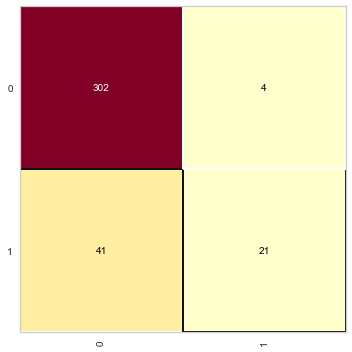

In [97]:
# Matriz de confusão
plt.figure(figsize=(5,5))
cm = ConfusionMatrix(rl)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [98]:
# Matriz de confusão
c1 = confusion_matrix(y_test, y_pred_rl)
c1

array([[302,   4],
       [ 41,  21]], dtype=int64)

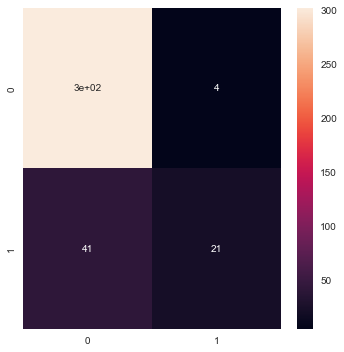

In [99]:
plt.figure(figsize=(5,5))
sns.heatmap(c1, annot=True);

**Nota:**

- Na classe 0 (Não tem chance de sair da empresa):
  - O algoritmo classificou corretamente 302 funcionários que não vão sair da empresa e 4 funcionários algoritmo errou porque de fato eles vão sair da empresa.
  - Esta classe é bem interessante, parece que ele não erra, quando são funcionários que não vai sair da empresa.
  
- Na classe 1 (Chance em sair da empresa):
  - O algoritmo classificou de forma erradamente 41 funcionários que não vão sair da empresa e 21 funcionários algoritmo acertou porque de fato eles vão sair da empresa.
  - Podemos dizer que o setor do RH não pode entrar em contato com as 41 pessoas para tentar manter elas na empresa.
  
- Em resumo essa matriz de confusão indica que a classe 0 tem um bom resultado, o algoritmo consegue identificar estes registros que não vão sair da empresa, porém ele tem mais dificuldade de identificar pessoas vão sair da empresa, que é o foco deste estudo de caso.

In [100]:
# Resultado em porcentagem
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       306
           1       0.84      0.34      0.48        62

    accuracy                           0.88       368
   macro avg       0.86      0.66      0.71       368
weighted avg       0.87      0.88      0.86       368



**Nota:**

- Na classe 0 (Não tem chance de sair da empresa):
  - O algoritmo consegue identificar corretamente 99% dos dos funcionários que não tem chance de sair da empresa e quando ele identifica, tem uma presisão de 88%.
  
- Na classe 1 (Chance em sair da empresa):
  - O algoritmo consegue identificar corretamente 34% dos funcionários que tem chance em sair da empresa e quando ele identifica, tem uma presisão de 84%.

### <font color='#F37126'> 6.3. Random forest - F1 score 58%

- **Random Forest**.
  - Objetivo é encontrar várias árvores de decisão, para gerar a resposta final
  - Random Forest (floresta randômica) é um conjunto de árvores.
  - Em regressão ele usa a média e em classificação vai usar os votos da maioria para dar a resposta final.

O treinamento de uma árvore de decisão é justamente encontrar a ordem de importância dos atributos ou seja encontrar o melhor conjunto de divisores utilizando uma árvore de decisão.

In [101]:
# Criar a variável do algoritmo
rf = RandomForestClassifier()
# Treinamento
rf.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
# Fazendo a previsão
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
# Aqui temos a resposta real que estão na base de dados
y_test

3       0
68      0
906     0
1399    0
1113    0
       ..
78      0
870     0
538     0
626     0
1233    0
Name: attrition, Length: 368, dtype: int64

In [104]:
# Acurácia - Cálculo da taxa de acerto
accuracy_score(y_test, y_pred_rf)

0.8532608695652174

In [105]:
# Precisão
precision_score(y_test, y_pred_rf)

1.0

In [106]:
# Recall
recall_score(y_test, y_pred_rf)

0.12903225806451613

In [107]:
# Métrica para toda base de dados
f1_score(y_test, y_pred_rf, average='macro')

0.5737451737451738

0.8532608695652174

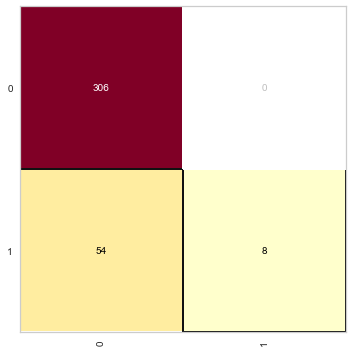

In [108]:
# Matriz de confusão
plt.figure(figsize=(5,5))
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [109]:
# Matriz de confusão
c2 = confusion_matrix(y_test, y_pred_rf)
c2

array([[306,   0],
       [ 54,   8]], dtype=int64)

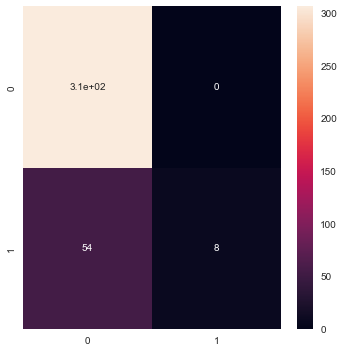

In [110]:
plt.figure(figsize=(5,5))
sns.heatmap(c2, annot=True);

**Nota:**

- Na classe 0 (Não tem chance de sair da empresa):
  - O algoritmo classificou corretamente 304 funcionários que não vão sair da empresa e 1 funcionários algoritmo errou porque de fato eles vão sair da empresa.
  
- Na classe 1 (Chance em sair da empresa):
  - O algoritmo classificou de forma errada 54 funcionários que não vão sair da empresa e 9 funcionários algoritmo acertou porque de fato eles vão sair da empresa.

In [111]:
# Resultado em porcentagem
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       306
           1       1.00      0.13      0.23        62

    accuracy                           0.85       368
   macro avg       0.93      0.56      0.57       368
weighted avg       0.88      0.85      0.80       368



**Nota:**

- Na classe 0 (Não tem chance de sair da empresa):
  - O algoritmo consegue identificar corretamente 100% dos dos funcionários que não tem chance de sair da empresa e quando ele identifica, tem uma presisão de 85%.
  
- Na classe 1 (Chance em sair da empresa):
  - O algoritmo consegue identificar corretamente 14% dos funcionários que tem chance em sair da empresa e quando ele identifica, tem uma presisão de 90%.

### <font color='#F37126'> 6.4. Redes neurais artificiais - F1 score 73%

- **Redes Neurais**
  - Objetivo é encontrar o melhor conjunto de pesos para classificar os dados.
  - Redes neurais é indicado para muitos dados (big data) e problemas complexos.<br>
  - A rede neural vai aprender sobre o melhor conjunto de pesos para uma determinada base de dados, ou seja uma rede neural vai análisar os atributos, que são as entradas e vai ter que escolher qual melhor conjunto de pesos para cada um dos atributos.
  - Assim para o algoritmo SVM os dados precisam estar normalizados caso contrário a rede neural vai demorar muito tempo e os resultados não vão ser tão interessantes.

In [112]:
X_train.shape

(1102, 50)

In [113]:
# Fórmula para definir quantas camadas podemos usar (número de entrada + número de saída)
(50 + 1) / 2

25.5

In [114]:
# Classe para definir uma rede neural
rede_neural = tf.keras.models.Sequential()
# Camadas
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))#Camada de Saída, porque aqui teremos a resposta

In [115]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [116]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [117]:
# usando a base de treinamento
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 2s 3ms/step - loss: 0.4480 - accuracy: 0.8358
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 0.4099 - accuracy: 0.8412
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8412
Epoch 4/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8421
Epoch 5/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.8485
Epoch 6/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 0.8584
Epoch 7/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.8739
Epoch 8/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8793
Epoch 9/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.8784
Epoch 10/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3007 - accuracy: 0.8820
Epoch 11/

35/35 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9891
Epoch 84/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9918
Epoch 85/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9918
Epoch 86/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9918
Epoch 87/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9946
Epoch 88/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9955
Epoch 89/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9927
Epoch 90/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9927
Epoch 91/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9973
Epoch 92/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9936
Epoch 93/200


35/35 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 166/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 167/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 168/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 169/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 170/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 171/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 172/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 173/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoc

In [118]:
# Usando a base de teste
y_pred_rn = rede_neural.predict(X_test)

12/12 [==============================] - 0s 3ms/step


In [119]:
# Aplicando uma codificação para a fazer transformação e gerar as classes
y_pred_rn = (y_pred_rn >= 0.5)

In [120]:
# Matriz de confusão
c3 = confusion_matrix(y_test, y_pred_rn)
c3

array([[274,  32],
       [ 39,  23]], dtype=int64)

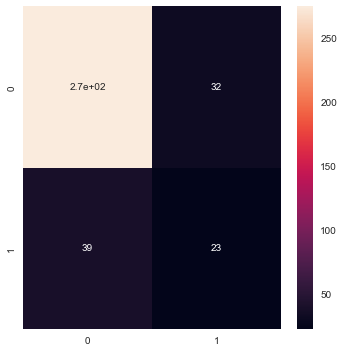

In [121]:
plt.figure(figsize=(5,5))
sns.heatmap(c3, annot=True);

**Nota:**

- Na classe 0 (Não tem chance de sair da empresa):
  - O algoritmo classificou corretamente 278 funcionários que não vão sair da empresa e 27 funcionários algoritmo errou porque de fato eles vão sair da empresa.
  
- Na classe 1 (Chance em sair da empresa):
  - O algoritmo classificou de forma errada 31 funcionários que não vão sair da empresa e 32 funcionários algoritmo acertou porque de fato eles vão sair da empresa.
  - Nesta classe podemos ver que ele está melhor que o algoritmo de regressão logística (24) e também melhor que o algoritmo de Random forest (9).
  - Resultado interessante porque o objetivo é descobrir quantos funcionários tem o desejo em sair da empresa.

In [122]:
# Resultado em porcentagem
print(classification_report(y_test, y_pred_rn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       306
           1       0.42      0.37      0.39        62

    accuracy                           0.81       368
   macro avg       0.65      0.63      0.64       368
weighted avg       0.80      0.81      0.80       368



**Nota:**

- Na classe 0 (Não tem chance de sair da empresa):
  - O algoritmo consegue identificar corretamente 91% dos dos funcionários que não tem chance de sair da empresa e quando ele identifica, tem uma presisão de 90%.
  
- Na classe 1 (Chance em sair da empresa):
  - O algoritmo consegue identificar corretamente 51% dos funcionários que tem chance em sair da empresa e quando ele identifica, tem uma presisão de 54%.

### <font color='#F37126'> 6.5. Comparar o desempenho dos modelos

In [123]:
# Resultado em porcentagem - Regressão logística
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       306
           1       0.84      0.34      0.48        62

    accuracy                           0.88       368
   macro avg       0.86      0.66      0.71       368
weighted avg       0.87      0.88      0.86       368



In [124]:
# Resultado em porcentagem - Random forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       306
           1       1.00      0.13      0.23        62

    accuracy                           0.85       368
   macro avg       0.93      0.56      0.57       368
weighted avg       0.88      0.85      0.80       368



In [125]:
# Resultado em porcentagem - Redes neurais artificiais
print(classification_report(y_test, y_pred_rn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       306
           1       0.42      0.37      0.39        62

    accuracy                           0.81       368
   macro avg       0.65      0.63      0.64       368
weighted avg       0.80      0.81      0.80       368



**Nota:**
- Como objetivo deste estudo de caso é **Fazer uma previsão de quais funcionários são mais propensos para sair do emprego**, o modelo usando Regressão logística tem um melhor desempenho, porque o algoritmo consegue ter uma precisão de 84% e com f1-score de 71%, que pode ajudar a diminuir o esforço do RH para encontrar estes funcionários com tendências de sair da empresa e continuar colhendo informações para melhorar o recall do algoritmo.

# <font color='red'> 7 - AVALIAÇÃO DO ALGORITMO
<a id='modelo'></a>

## <font color='blue'> PASSO 7 - Tradução e Interpretação do modelo
<a id='passo9'></a>

### <font color='#F37126'> 7.1. Leitura dos dados

**Importar e avaliar**

In [126]:
# Resultado em porcentagem - Regressão logística
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       306
           1       0.84      0.34      0.48        62

    accuracy                           0.88       368
   macro avg       0.86      0.66      0.71       368
weighted avg       0.87      0.88      0.86       368



### <font color='#F37126'> 7.2. Performance dos negócios

**Criando a transformação para o time de negócio**

In [142]:
# A contratação de um novo funcionário custa em média $7.645 (em uma empresa com aproximadamente 500 funcionários)
tab =[['Custo', 'Quantidade', '  Total', 'Func. com Chance em Sair','Precisão do modelo','Oportunidade'],
      ['$7.645', '500    ', '$3.822.500', '170            ','142        ','$1.085.590'],
     ]  
print( tabulate( tab, headers='firstrow' ) )

Custo      Quantidade    Total       Func. com Chance em Sair    Precisão do modelo  Oportunidade
-------  ------------  ----------  --------------------------  --------------------  --------------
$7.645        500      $3.822.500             170                       142          $1.085.590


**Nota:**
- Aplicando o modelo podemos identificar sobre os 500 funcionários, 142 colaboradores com chance em sair da empresa, surgindo uma oportunidade para o RH em reduzir um desperdício de contratação de $1.085.590.

# <font color='red'> 8 - IMPLEMENTAR O MODELO PARA A PRODUÇÃO
<a id='producao'></a>

## <font color='blue'> PASSO 8 - Modelo em Produção
<a id='passo10'></a>

#### Salvando o arquivo treinado

In [128]:
# salvando as variáveis
with open('variaveis_modelo.pkl', 'wb') as f:
    pickle.dump([scaler, onehotencoder, rl], f)

#### Aplicando uma simulação

In [129]:
# Abrir o arquivo
with open('variaveis_modelo.pkl', 'rb') as f:
    min_max, encoder, model = pickle.load(f)

In [130]:
# Valores
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [131]:
# Testando com um novo funcionário (buscando na mesma tabela para testar)
X_novo = df_funcionario.iloc[0:1]
X_novo

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5


**Nota:**
- Objetivo é descobrir se este funcionário tem chance em sair da empresa ou não.

#### Transformação dos atributos categóricos

In [132]:
# Selecionando os atributos categóricos
X_cat_novo = X_novo[['business_travel', 'department', 'education_field', 'gender', 'job_role', 'marital_status']]
X_cat_novo

,business_travel,department,education_field,gender,job_role,marital_status
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [133]:
# Aplicação do one hot enconder
X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [134]:
X_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [135]:
# Transformando para dataframe
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Transformação dos atributos numéricos

In [136]:
# Dados numéricos
X_numerical_novo = X_novo[['age', 'daily_rate', 'distance_from_home','education', 'environment_satisfaction', 
                                'hourly_rate', 'job_involvement','job_level','job_satisfaction','monthly_income',
                                'monthly_rate','num_companies_worked','over_time','percent_salary_hike', 
                                'performance_rating','relationship_satisfaction','stock_option_level','total_working_years',
                                'training_times_last_year', 'work_life_balance','years_at_company','years_in_current_role', 
                                'years_since_last_promotion','years_with_curr_manager']]
X_numerical_novo

,age,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5


In [137]:
# Juntando as tabelas
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)

#### Transformação Rescaling

In [138]:
# Transformando os dados para a mesma escala
X_novo = min_max.transform(X_all_novo)

C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


#### Previsão

In [139]:
model.predict(X_novo)

array([1], dtype=int64)

**Nota:**
- O algoritmo classificou este funcionário com chance em sair da empresa.

In [140]:
# Probabilidade
model.predict_proba(X_novo)

array([[0.47423286, 0.52576714]])

In [141]:
model.classes_

array([0, 1], dtype=int64)

**Nota:**
- O algoritmo classificou 64% de certeza que este funcionário tem chance em sair da empresa e 35% que não tem chance em sair da empresa.

# <font color='red'> INSIGHTS

**Resumo dos insights durante análise exploratória de dados (EDA):**


**Variável idade:**
- A maior concentração de pessoas nesta empresa tem a idade entre 25 à 40 anos.
- A média das pessoas que saem da empresa é de 33 anos e a média das pessoas que ficam é de 37 anos e isso acaba validando a ideia que em geral as pessoas mais novas tem uma maior tendência de sairem da empresa.

**Variável distância da casa para empresa:**
- Podemos perceber que a maioria das pessoas moram próximo da empresa.
- As pessoas que sairam a distância média é de 10 km e para as pessoas que ficaram é de 8 km.
- A densidade das pessoas que ficam na empresa está maior, entre 1 á 3 km.

**Variável grau de escolaridade:**
- A maioria está no nível 3, que as pessoas com faculdade.
- Observando este atributo, pode ser um indicativo de que as pessoas que tem uma formação maior elas consequentemente tem um salário maior e por isso que elas acabam ficando na empresa.

**Variável salário da pessoa:**
- Para as pessoas que sairam a média é de 750 e para as pessoas que ficaram é 812,isso indica que o salário das pessoas que ficam na empresa é maior que das pessoas que saem da empresa.
- A maioria das pessoas que saem estão na categoria 1, no grupo de pessoas que tem os salários mais baixo.
- A pessoa que ganha mais é do gênero feminino.
- O Sale Representative é a profissão que mais perde e motivo pode ser pelo salário que é o menor de todos.

**Conclusão:**
- Quanto mais nova a pessoa, mais chance ela tem de procurar outro tipo de emprego.
- Quanto maior a distância entre o trabalho e a casa do funcionário, maior é a chance dele sair da empresa.
- As pessoas que tem um grau de escolaridade menor tem mais chance de sairem da empresa, então a empresa pode oferecer um desconto em mensalidade de faculdades.
- Pessoas que saem da empresa elas vão procurar um emprego melhor que tenha uma salário melhor, e o departamento onde trabalha pode ser no setor de Sale Representative e a maioria pode ser do gênero masculino e solteiro (a).

# <font color='red'> PRÓXIMO PASSOS

Registros que são outliers: 147
  - Devemos depois fazer uma análise mais profunda para compreender.